# Assignment 1

#### Following code is just used to increase cell width

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

#### Import all the libraries required

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### Read data

In [31]:
data = pd.read_csv("superconduct/train.csv")

In [32]:
pd.set_option('display.max_columns', None)
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.25,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,3592.019281,81.8375,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.9055,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425,1

In [33]:
data.dtypes

number_of_elements         int64
mean_atomic_mass         float64
wtd_mean_atomic_mass     float64
gmean_atomic_mass        float64
wtd_gmean_atomic_mass    float64
                          ...   
range_Valence              int64
wtd_range_Valence        float64
std_Valence              float64
wtd_std_Valence          float64
critical_temp            float64
Length: 82, dtype: object

#### Check for null values in input data

In [34]:
print(data.isnull().values.any())
print(data.isnull().sum().sum())

False
0


#### Distribution plot for **critical_temp**

/opt/homebrew/anaconda3/envs/ownenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


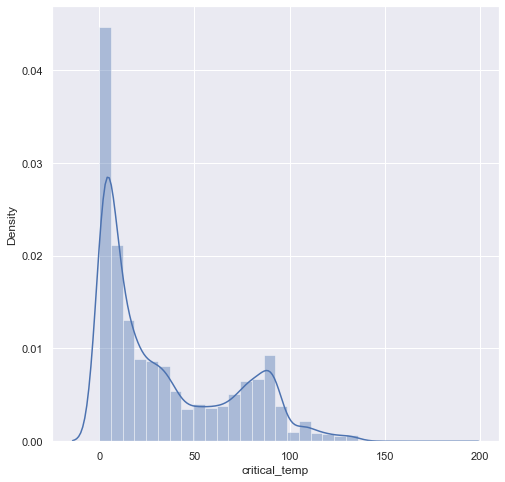

In [35]:
sns.set(rc={'figure.figsize':(8,8)})
sns.distplot(data['critical_temp'], bins=30)
plt.show()

#### Correlation matrix inbetween all the attributes

<AxesSubplot:>

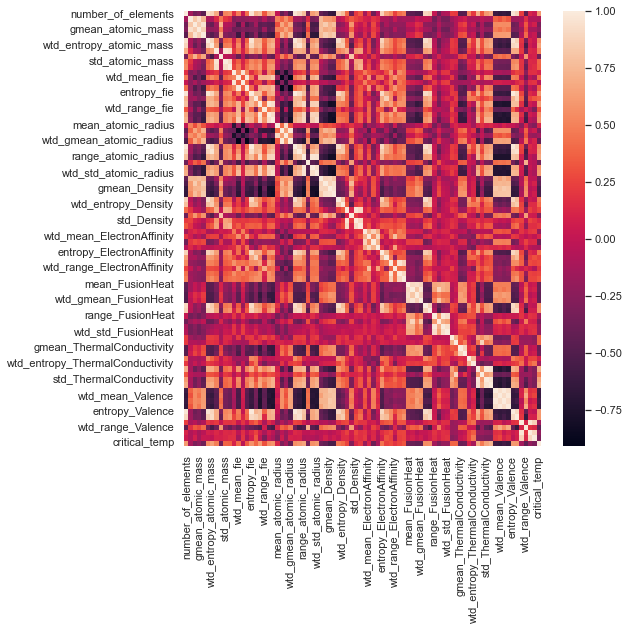

In [36]:
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix)

In [37]:

corr_matrix = data.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# df.drop(to_drop, axis=1, inplace=True)

In [38]:
to_drop

['wtd_gmean_atomic_mass',
 'std_atomic_mass',
 'gmean_fie',
 'wtd_gmean_fie',
 'entropy_fie',
 'std_fie',
 'wtd_gmean_atomic_radius',
 'entropy_atomic_radius',
 'wtd_entropy_atomic_radius',
 'std_atomic_radius',
 'wtd_std_atomic_radius',
 'wtd_gmean_Density',
 'std_Density',
 'std_ElectronAffinity',
 'wtd_gmean_FusionHeat',
 'std_FusionHeat',
 'std_ThermalConductivity',
 'wtd_std_ThermalConductivity',
 'gmean_Valence',
 'wtd_gmean_Valence',
 'entropy_Valence',
 'wtd_entropy_Valence',
 'std_Valence']

In [15]:
# corr_matrix = data.corr().abs()
# high_corr_var=np.where(corr_matrix>0.9)
# high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [ ]:
# high_corr_var

In [39]:
to_drop

['wtd_gmean_atomic_mass',
 'std_atomic_mass',
 'gmean_fie',
 'wtd_gmean_fie',
 'entropy_fie',
 'std_fie',
 'wtd_gmean_atomic_radius',
 'entropy_atomic_radius',
 'wtd_entropy_atomic_radius',
 'std_atomic_radius',
 'wtd_std_atomic_radius',
 'wtd_gmean_Density',
 'std_Density',
 'std_ElectronAffinity',
 'wtd_gmean_FusionHeat',
 'std_FusionHeat',
 'std_ThermalConductivity',
 'wtd_std_ThermalConductivity',
 'gmean_Valence',
 'wtd_gmean_Valence',
 'entropy_Valence',
 'wtd_entropy_Valence',
 'std_Valence']

In [88]:
updatedData = data[data.columns.difference(to_drop)]
# updatedData = data

In [89]:
updatedData.shape

(21263, 59)

In [90]:
updatedData.describe()

,critical_temp,entropy_Density,entropy_ElectronAffinity,entropy_FusionHeat,entropy_ThermalConductivity,entropy_atomic_mass,gmean_Density,gmean_ElectronAffinity,gmean_FusionHeat,gmean_ThermalConductivity,gmean_atomic_mass,gmean_atomic_radius,mean_Density,mean_ElectronAffinity,mean_FusionHeat,mean_ThermalConductivity,mean_Valence,mean_atomic_mass,mean_atomic_radius,mean_fie,number_of_elements,range_Density,range_ElectronAffinity,range_FusionHeat,range_ThermalConductivity,range_Valence,range_atomic_mass,range_atomic_radius,range_fie,wtd_entropy_Density,wtd_entropy_ElectronAffinity,wtd_entropy_FusionHeat,wtd_entropy_ThermalConductivity,wtd_entropy_atomic_mass,wtd_entropy_fie,wtd_gmean_ElectronAffinity,wtd_gmean_ThermalConductivity,wtd_mean_Density,wtd_mean_ElectronAffinity,wtd_mean_FusionHeat,wtd_mean_ThermalConductivity,wtd_mean_Valence,wtd_mean_atomic_mass,wtd_mean_atomic_radius,wtd_mean_fie,wtd_range_Density,wtd_range_ElectronAffinity,wtd_range_FusionHeat,wtd_range_ThermalConductivity,wtd_range_Valence,wtd_range_atomic_mass,wtd_range_atomic_radius,wtd_range_fie,wtd_std_Density,wtd_std_ElectronAffinity,wtd_std_FusionHeat,wtd_std_Valence,wtd_std_atomic_mass,wtd_std_fie
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,34.421219,1.072425,1.070250,1.093343,0.727630,1.165608,3460.692235,54.359502,10.136977,29.841727,71.290627,144.448738,6111.465214,76.879751,14.296113,89.706911,3.198228,87.557631,157.983101,769.614748,4.115224,8665.438818,120.730514,21.138994,250.893443,2.041010,115.601251,139.325025,572.222612,0.856037,0.770757,0.914065,0.539991,1.063884,0.926726,72.416225,27.308061,5267.188547,92.717486,13.848001,81.549080,3.153127,72.988310,134.720039,870.442317,2902.736814,59.332637,8.218528,62.033066,1.483007,33.225218,51.369885,483.517264,3319.170628,44.409356,7.717576,0.673987,41.448045,224.050033
std,34.254362,0.342356,0.343391,0.375932,0.325976,0.364930,3703.256370,29.007425,10.065901,34.059581,31.030272,22.090958,2846.785185,27.701890,11.300188,38.517485,1.044611,29.676497,20.147288,87.488694,1.439295,4097.126831,58.700327,20.370620,158.703557,1.242345,54.626887,67.272228,309.614442,0.319761,0.285986,0.370125,0.318248,0.401423,0.334018,31.648444,40.191150,3221.314506,32.276387,14.279335,45.519256,1.191249,33.490406,28.801567,143.278200,2398.471020,28.620409,11.414066,43.123317,0.978176,26.967752,35.019356,224.042874,1611.799629,20.429293,7.288239,0.455580,19.983544,127.927104
min,0.000210,0.000000,0.000000,0.000000,0.000000,0.000000,1.429000,1.500000,0.222000,0.026580,5.320573,48.000000,1.429000,1.500000,0.222000,0.026580,1.000000,6.941000,48.000000,375.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.022952,1.429000,1.500000,0.222000,0.026580,1.000000,6.423452,48.000000,375.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.365000,0.913959,0.890589,0.833333,0.457810,0.966676,883.117278,33.700512,4.109978,8.339818,58.041225,133.542493,4513.500000,62.090000,7.588667,61.000000,2.333333,72.458076,149.333333,723.740000,3.000000,6648.000000,86.700000,12.878000,86.382000,1.000000,78.512902,80.000000,262.400000,0.688693,0.66066

#### Overview of input data

In [91]:
# data.describe()

In [92]:
# X = updatedData.iloc[:, :81]
# Y = nData.iloc[:, 81]

X = updatedData.loc[:, updatedData.columns != 'critical_temp']
Y = updatedData.loc[:, updatedData.columns == 'critical_temp']

#### Initializing standard scaler and normalizing the input data

In [93]:
s = StandardScaler()
attributes = list(X.columns)
normalizedFeatures = pd.DataFrame(s.fit_transform(X), columns = attributes)

#### Overview of input data after normalization

In [94]:
normalizedFeatures.describe()

,entropy_Density,entropy_ElectronAffinity,entropy_FusionHeat,entropy_ThermalConductivity,entropy_atomic_mass,gmean_Density,gmean_ElectronAffinity,gmean_FusionHeat,gmean_ThermalConductivity,gmean_atomic_mass,gmean_atomic_radius,mean_Density,mean_ElectronAffinity,mean_FusionHeat,mean_ThermalConductivity,mean_Valence,mean_atomic_mass,mean_atomic_radius,mean_fie,number_of_elements,range_Density,range_ElectronAffinity,range_FusionHeat,range_ThermalConductivity,range_Valence,range_atomic_mass,range_atomic_radius,range_fie,wtd_entropy_Density,wtd_entropy_ElectronAffinity,wtd_entropy_FusionHeat,wtd_entropy_ThermalConductivity,wtd_entropy_atomic_mass,wtd_entropy_fie,wtd_gmean_ElectronAffinity,wtd_gmean_ThermalConductivity,wtd_mean_Density,wtd_mean_ElectronAffinity,wtd_mean_FusionHeat,wtd_mean_ThermalConductivity,wtd_mean_Valence,wtd_mean_atomic_mass,wtd_mean_atomic_radius,wtd_mean_fie,wtd_range_Density,wtd_range_ElectronAffinity,wtd_range_FusionHeat,wtd_range_ThermalConductivity,wtd_range_Valence,wtd_range_atomic_mass,wtd_range_atomic_radius,wtd_range_fie,wtd_std_Density,wtd_std_ElectronAffinity,wtd_std_FusionHeat,wtd_std_Valence,wtd_std_atomic_mass,wtd_std_fie
count,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04
mean,2.110008e-15,-5.874543e-15,-8.401085e-15,2.305763e-17,-7.291089e-16,-2.854766e-15,5.566518e-16,8.277611e-16,-2.484324e-15,-1.972493e-15,-1.407826e-15,-2.289418e-15,-1.650125e-15,2.465454e-15,-1.008020e-15,1.144284e-14,-1.554934e-16,2.463042e-15,-9.691255e-16,-2.315084e-14,9.686003e-15,-5.873431e-16,8.361306e-15,-3.286731e-14,1.523405e-14,1.987268e-14,3.555925e-14,4.280568e-14,1.560949e-15,-8.670690e-16,-7.290828e-16,-1.134221e-15,-2.588337e-15,1.158925e-15,1.501931e-17,-1.333714e-15,-5.352755e-16,1.205346e-15,4.212511e-15,3.098302e-15,-1.559555e-15,-4.762947e-16,2.334548e-15,-2.315671e-15,-2.534989e-15,-2.820918e-15,-3.345145e-16,3.671495e-15,-7.669927e-16,4.419563e-16,4.254097e-16,1.285385e-15,8.346070e-16,-8.055761e-16,-1.180962e-15,1.393222e-15,3.891863e-16,-4.317709e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-3.132555e+00,-3.116781e+00,-2.908421e+00,-2.232210e+00,-3.194131e+00,-9.341359e-01,-1.822318e+00,-9.850296e-01,-8.754027e-01,-2.126040e+00,-4.366085e+00,-2.146344e+00,-2.721169e+00,-1.245505e+00,-2.328357e+00,-2.104400e+00,-2.716578e+00,-5.459081e+00,-4.504857e+00,-2.164461e+00,-2.115054e+00,-2.056775e+00,-1.037744e+00,-1.580931e+00,-1.642907e+00,-2.116247e+00,-2.071112e+00,-1.848222e+00,-2.677179e+00,-2.695146e+00,-2.469670e+00,-1.696799e+00,-2.650340e+00,-2.774548e+00,-2.240802e+00,-6.788995e-01,-1.634700e+00

#### Splitting data attributes (**X**) and prediction variable (**Y**)

#### Splitting whole data into train (**80%**) and test (**20%**)

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(normalizedFeatures, Y, test_size = 0.2)

#### Function to initialize **weights** and **intercepts**

In [96]:
def initialModel(X_train,Y_train):
    global w
    global b
    w=np.zeros((X_train.shape[1],1))
    b=np.zeros((1))
    yhat = np.dot(X_train,w) + b
    cost = calculateCost(yhat,Y_train)
    return cost

#### Function to calculate cost according to predicted values

In [97]:
def calculateCost(yhat,y):
    N = len(y)
    return (1/(2*N))*np.sum((yhat-y)**2)

#### Training model with respect to **Learning Rate** and **Number of Iterations**

In [98]:
def trainingModel(w,b,X_train,Y_train,learningRate,numIterations):
#     bGradient = 0
#     wGradient = 0
    costs = []
    slopes = []
    intercepts = []
    N=len(X_train)
#     yhat=np.dot(X_train,w)+b
    for i in range(numIterations):
        yhat=X_train.dot(w)+b
        w -= (1/N)*learningRate*(X_train.T.dot((yhat-Y_train)))
        b -= (1/N)*learningRate*(np.sum(yhat-Y_train))
        #bGradient += -(2/N)*(trainingY-((wCurrent*trainingX)+bCurrent))
        #wGradient += -(2/N)*np.dot(trainingX.T,(trainingY-((wCurrent*trainingX)+bCurrent)))
        #b=bCurrent-(learningRate*bGradient)
        #w=wCurrent-(learningRate*wGradient)
#         print(w)
        cost = calculateCost(yhat,Y_train)
#         print(cost)
        costs.append(cost)
        slope = np.squeeze(w)
        intercept = np.squeeze(b)
        slopes.append(slope)
        intercepts.append(intercept)
    return (costs,slopes,intercepts)

#### Reshaping **Y** into a 1 dimensional array in order to perform matrix multiplication

In [99]:
Y_train = Y_train.values.reshape(Y_train.shape[0],1)
Y_test = Y_test.values.reshape(Y_test.shape[0],1)

#### * Initializing weights and intercepts
#### * Train algorithm by updating weights and intercepts
#### * Storing costs, weights and intercepts

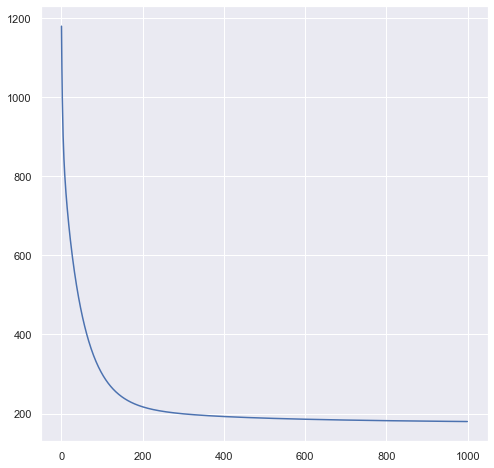

In [100]:
initialModel(X_train, Y_train)
costs,slopes,intercepts = trainingModel(w,b,X_train,Y_train,learningRate=0.01,numIterations=1000)
plt.plot(costs)

#### * Get ultimate value in weights vector and intercept vector since it has all the updated weights and final intercept
#### * Calculate predicted **Y** using these updated weights and intercept
#### * Calculate root mean squared error

In [101]:
finalW=slopes[-1]
finalB=intercepts[-1]
finalYhat=np.dot(X_test,finalW)+finalB
finalYhat = finalYhat.reshape(finalYhat.shape[0],1)
meanSquareError=np.dot((finalYhat-Y_test).T,(finalYhat-Y_test))
rootMeanSquareError=(meanSquareError**0.5)
print(meanSquareError)
print(rootMeanSquareError)

[[1541294.00193417]]
[[1241.48862336]]


In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(normalizedFeatures, Y, test_size = 0.2)

In [81]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [82]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 17.54891406787995
R2 score is 0.7384838637366185




In [83]:
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for testing set
--------------------------------------
RMSE is 17.61675576684753
R2 score is 0.7315475415154451


